# Aula 3 - Regressão linear

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) Regressão linear simples
- 3) Regressão linear múltipla
- 4) Overfitting

____
____
____

## 1) Introdução

Imagine que você quer vender sua casa.

Você sabe os atributos da sua casa: quantos cômodos têm, quantos carros cabem na garagem, qual é a área construída, qual sua localidade, etc.

Agora, a pergunta é: qual seria o melhor preço pra você colocá-la a venda, ou seja, quanto de fato ela vale?

Você pode solicitar a avaliação de um corretor de imóveis (contando com a experiência dele), ou então...

...fazer um modelo de **Machine Learning**, que, com base nos atributos e preços de diversas outras casas, pode fazer uma **predição** sobre o preço adequado da sua casa!

Para resolver este problema, podemos utilizar um dos mais simples e importantes algoritmos de machine learning: a **Regressão Linear!**

____

Para introduzirmos as ideias, vamos usar um [dataset de preço de casas](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

Esta base de dados contém **79 features** (+ 1 ID), que são as características de cada uma das casas listadas; e **1 target**, que é o preço pelo qual aquela casa foi vendida.

Por termos o target disponível, estamos trabalhando com um problema de **aprendizagem supervisionada**.

Para o significado de cada uma das features, e os valores que elas podem assumir, veja a página acima.

**Vamos ler a base e começar a explorá-la!**

In [1]:
# importe as principais bibliotecas de análise de dados
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# leia a base "house_prices"
df = pd.read_csv('house_prices.csv')

In [3]:
# dê uma olhada nas 5 primeiras linhas
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# dê uma olhada na estrutura das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# algumas estatísticas rápidas?
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#estatísticas do target?
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
# há dados missing?
nulos = df.isnull().sum()

In [8]:
#absoluto
nulos

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
#percentual
nulos_pct = nulos/df.shape[0]

In [10]:
nulos_pct

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [11]:
nulos_pct[nulos_pct>0.5]

Alley          0.937671
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

Por enquanto, não vamos nos preocupar com os dados missing, pois vamos usar apenas uma feature no nosso modelo inicial.

Aproveite para depois explorar os dados da forma que quiser!

Por enquanto, vamos dar uma olhada na coluna target!

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

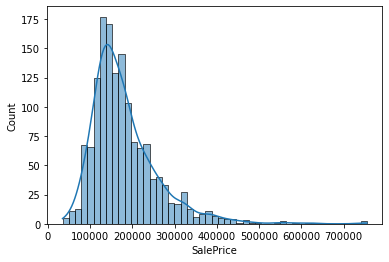

In [12]:
# dê uma olhada na distribuição dos preços "SalePrice"
sns.histplot(data=df, x="SalePrice", kde=True)

In [13]:
#skewness
df["SalePrice"].skew()

1.8828757597682129

Fica evidente que a distribuição é desviada para a direita.

Vamos tentar alterar isso na próximas versões do modelo para ver se teremos ganhos de performance!

Por enquanto, seguimos assim.

In [14]:
# Dê uma olhada na correlação entre as variáveis

correlacao = df.corr(method='spearman')

In [15]:
correlacao

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.019226,-0.033335,-0.005364,-0.028771,0.003622,-0.005130,-0.011680,-0.035507,-0.013038,...,-0.043239,-0.003225,-0.006758,-0.036706,0.005962,0.055555,-0.043383,0.019018,0.001526,-0.018546
MSSubClass,0.019226,1.000000,-0.314265,-0.269570,0.108065,-0.071770,0.035848,0.006802,0.025035,-0.107629,...,0.023370,0.031900,0.011023,-0.035830,-0.021673,0.033250,-0.032840,0.018403,-0.027401,0.007192
LotFrontage,-0.033335,-0.314265,1.000000,0.649633,0.254952,-0.083242,0.194510,0.116772,0.258906,0.154014,...,0.109288,0.178073,-0.095811,0.063960,0.043849,0.084534,0.024198,0.025758,0.003461,0.409076
LotArea,-0.005364,-0.269570,0.649633,1.000000,0.233303,-0.046912,0.103385,0.075158,0.177539,0.171995,...,0.184285,0.176965,-0.066563,0.062282,0.092316,0.084460,0.059297,0.006423,-0.027473,0.456461
OverallQual,-0.028771,0.108065,0.254952,0.233303,1.000000,-0.177521,0.647392,0.557723,0.413500,0.132957,...,0.259439,0.435046,-0.162434,0.032903,0.046335,0.056667,-0.088019,0.061455,-0.025464,0.809829
OverallCond,0.003622,-0.071770,-0.083242,-0.046912,-0.177521,1.000000,-0.416964,-0.041464,-0.179187,-0.011087,...,-0.042662,-0.133284,0.109749,0.032384,0.074728,-0.005605,0.086625,-0.007203,0.050214,-0.129325
YearBuilt,-0.005130,0.035848,0.194510,0.103385,0.647392,-0.416964,1.000000,0.684388,0.402349,0.189645,...,0.287729,0.392691,-0.408622,0.022498,-0.073119,0.008986,-0.091786,0.018621,-0.014100,0.652682
YearRemodAdd,-0.011680,0.006802,0.116772,0.075158,0.557723,-0.041464,0.684388,1.000000,0.234333,0.063353,...,0.230241,0.353325,-0.235037,0.051694,-0.045808,0.002821,-0.090868,0.021081,0.045158,0.571159
MasVnrArea,-0.035507,0.025035,0.258906,0.177539,0.413500,-0.179187,0.402349,0.234333,1.000000,0.241565,...,0.173736,0.208681,-0.179589,0.040997,0.038171,0.004863,-0.050279,0.017732,0.000552,0.421309
BsmtFinSF1,-0.013038,-0.107629,0.154014,0.171995,0.132957,-0.011087,0.189645,0.063353,0.241565,1.000000,...,0.179359,0.081420,-0.148339,0.046802,0.071989,0.057586,0.005097,-0.016405,0.020793,0.301871


<AxesSubplot:>

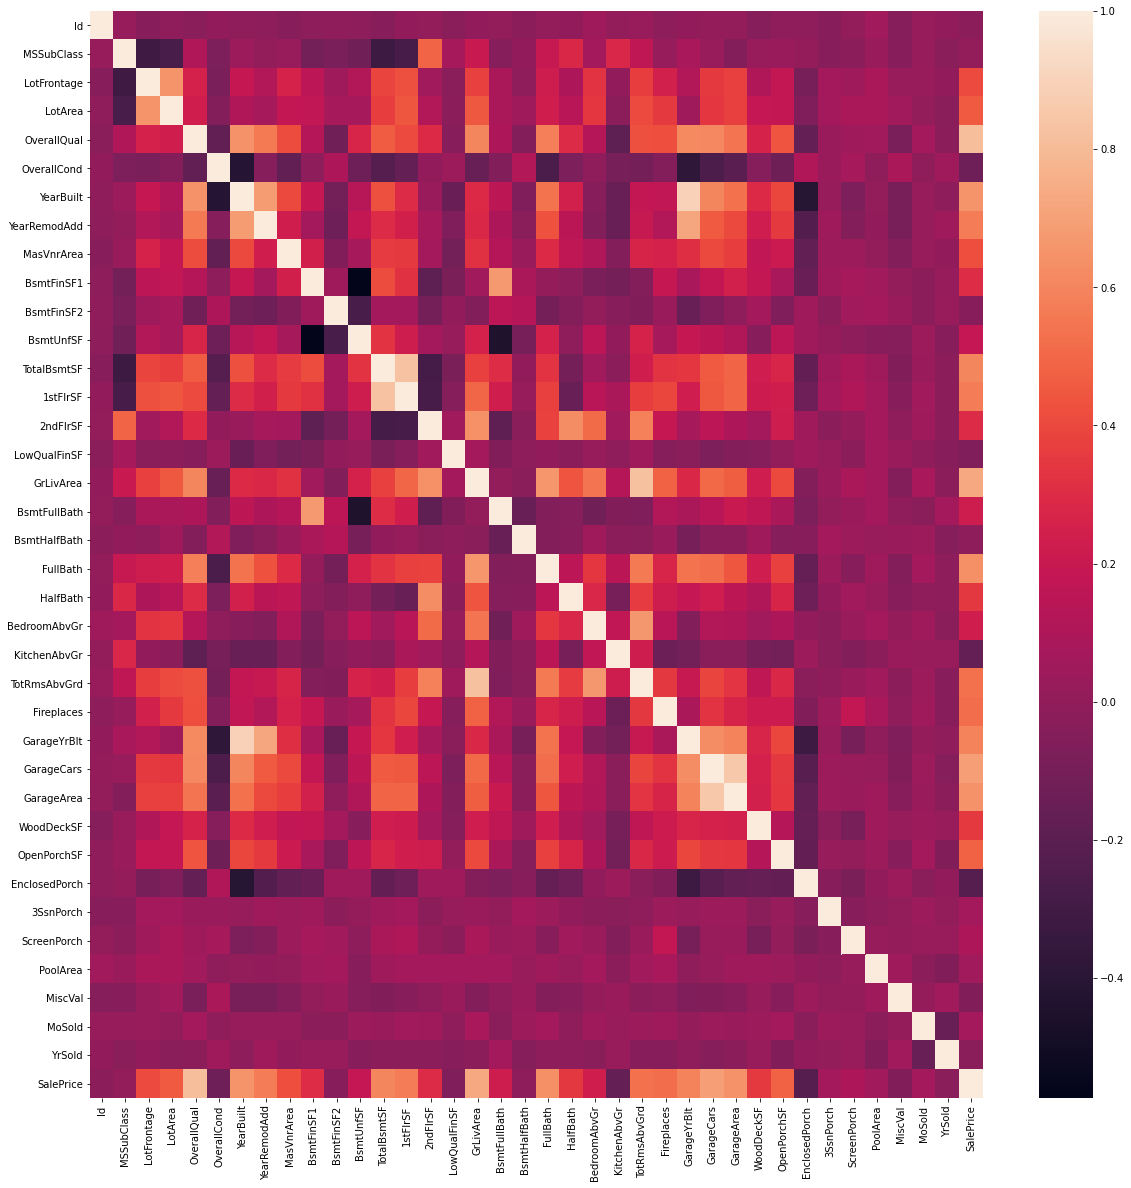

In [16]:
#heatmap
plt.figure(figsize=(20,20))
sns.heatmap(correlacao)

In [17]:
correlacao['SalePrice']

Id              -0.018546
MSSubClass       0.007192
LotFrontage      0.409076
LotArea          0.456461
OverallQual      0.809829
OverallCond     -0.129325
YearBuilt        0.652682
YearRemodAdd     0.571159
MasVnrArea       0.421309
BsmtFinSF1       0.301871
BsmtFinSF2      -0.038806
BsmtUnfSF        0.185197
TotalBsmtSF      0.602725
1stFlrSF         0.575408
2ndFlrSF         0.293598
LowQualFinSF    -0.067719
GrLivArea        0.731310
BsmtFullBath     0.225125
BsmtHalfBath    -0.012189
FullBath         0.635957
HalfBath         0.343008
BedroomAbvGr     0.234907
KitchenAbvGr    -0.164826
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
GarageYrBlt      0.593788
GarageCars       0.690711
GarageArea       0.649379
WoodDeckSF       0.353802
OpenPorchSF      0.477561
EnclosedPorch   -0.218394
3SsnPorch        0.065440
ScreenPorch      0.100070
PoolArea         0.058453
MiscVal         -0.062727
MoSold           0.069432
YrSold          -0.029899
SalePrice        1.000000
Name: SalePr

In [18]:
# veja quais são as variáveis mais correlacionadas com o target!
corr_y = correlacao['SalePrice'].abs().sort_values(ascending=False)

In [19]:
corr_y

SalePrice        1.000000
OverallQual      0.809829
GrLivArea        0.731310
GarageCars       0.690711
YearBuilt        0.652682
GarageArea       0.649379
FullBath         0.635957
TotalBsmtSF      0.602725
GarageYrBlt      0.593788
1stFlrSF         0.575408
YearRemodAdd     0.571159
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.421309
LotFrontage      0.409076
WoodDeckSF       0.353802
HalfBath         0.343008
BsmtFinSF1       0.301871
2ndFlrSF         0.293598
BedroomAbvGr     0.234907
BsmtFullBath     0.225125
EnclosedPorch    0.218394
BsmtUnfSF        0.185197
KitchenAbvGr     0.164826
OverallCond      0.129325
ScreenPorch      0.100070
MoSold           0.069432
LowQualFinSF     0.067719
3SsnPorch        0.065440
MiscVal          0.062727
PoolArea         0.058453
BsmtFinSF2       0.038806
YrSold           0.029899
Id               0.018546
BsmtHalfBath     0.012189
MSSubClass       0.007192
Name: SalePr

In [20]:
corr_y[corr_y>0.6].index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt',
       'GarageArea', 'FullBath', 'TotalBsmtSF'],
      dtype='object')

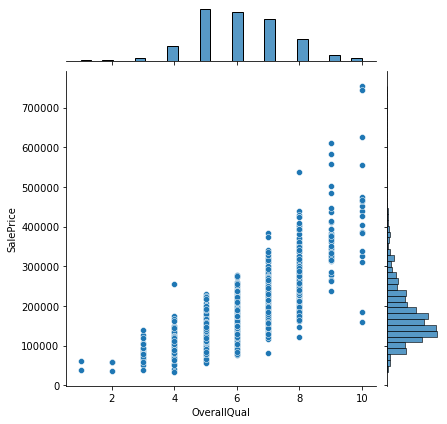

In [21]:
# explore agora a relação entre essas variáveis e o target
# dica: faça um jointplot ou scatterplot

sns.jointplot(data=df,x='OverallQual', y='SalePrice')
plt.show()

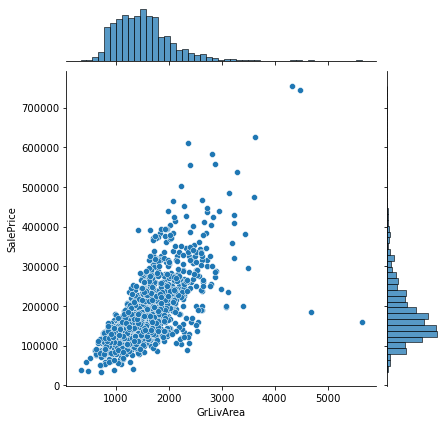

In [22]:
sns.jointplot(data=df, x='GrLivArea', y='SalePrice')
plt.show()

Parece que a variável de área construída ("GrLivArea") é uma forte candidata a **explicar** o preço das casas, pois vemos calaramente uma correlação entre as variáveis!

Mas note que há claramente dois outliers... 

In [23]:
df[df['GrLivArea']>4500]['GrLivArea']

523     4676
1298    5642
Name: GrLivArea, dtype: int64

In [24]:
df[~(df['GrLivArea']>4500)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [25]:
# identifique e remova os outliers
df = df[~(df['GrLivArea']>4500)]

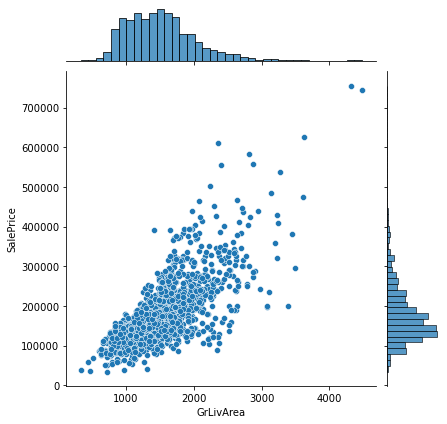

In [26]:
# faça o scatterplot novamente para verificar se os outliers sumiram
sns.jointplot(data=df, x='GrLivArea', y='SalePrice')

Vamos agora iniciar a construção de um modelo bem simples, que utilize a variável GrLivArea para predizer o preço!

___
___
___

## 2) Regressão linear simples

Apesar de alguns outliers, parece bem adequado que os pontos plotados acima sejam descritos por uma reta, não é mesmo?

Ou, melhor dizendo: **a variável GrLivArea parece estar relacionada ao target SalePrice linearmente!**

Para modelarmos esta relação, vamos conhecer o modelo de **Regressão Linear Simples**.

Como o próprio nome diz, o modelo de Regressão Linear será **uma reta (polinômio linear)**, que melhor se ajusta aos seus dados!

O modelo de **Regressão Linear Simples** será uma linha reta que relaciona Y (o preço da casa) e X (os atributos da casa). 

Se utilizarmos **apenas um atributo** (como, por exemplo, a área construída), temos uma **Regressão Linear Simples**, e nosso modelo é:

$$ y = b_0 + b_1 X $$

Neste caso, o modelo tem dois coeficientes a serem determinados: 

$$b_0 \text{ - intercepto ou coeficiente linear}$$
$$b_1 \text{ - coeficiente angular}. $$

A equação acima exprime a **forma funcional** do conjunto de hipóteses com o qual trabalharemos: funções lineares de uma única variável. Isto é,

$$ f_{H, \vec{b}} = b_0 + b_1 X $$

Ou seja,

$$ \mathcal{H} = \{ f_{H, \vec{b}}\} = \{ b_0 + b_1 X \} $$ 

é o conjunto de hipóteses que está sendo considerado, e o vetor de parâmetros é:

$$\vec{b} = \begin{bmatrix}
b_0\\ 
b_1
\end{bmatrix}$$


O **algoritmo de aprendizagem** do estimador é utilizado justamente para encontrarmos os coeficientes $b_0$ e $b_1$ (isto é, o vetor de parâmetros) **que melhor se ajustam aos dados!**

Para fazer isso, pode-se utilizar o método dos **mínimos quadrados** (OLS  - ordinary least squares) ou então o **gradiente descendente**.

[Explicação visual da Regressão usando Ordinary Least Squares](https://setosa.io/ev/ordinary-least-squares-regression/) 

Cálculo dos coeficientes com o método OLS:

$$b_1 = \frac{\sum_i (x_i - \overline{x})(y_i - \overline{y})}{\sum_i (x_i - \overline{x})^2}$$

$$b_0 = \overline{y} + b_1\overline{x}  $$

onde:

$\overline{x}:$ Média da feature $x$;

$\overline{y}:$ Média do target;

$x_i:$ valor da feature $x$ da amostra $i$;

$y_i:$ valor do target para a amostra $i$.

Mas não nos preocuparemos com os detalhes do treinamento: usaremos o sklearn para isso!

Vamos começar?

In [27]:
# crie duas variáveis, X e y, respectivamente os arrays da feature GrLiveArea e do target
X = df['GrLivArea']
y = df['SalePrice']

In [28]:
#X
X

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1458, dtype: int64

In [29]:
#y
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1458, dtype: int64

In [30]:
# 1) Importe a classe do estimador que se deseja treinar
from sklearn.linear_model import LinearRegression

In [31]:
# 2) Instancie a classe do estimador, escolhendo os hiperparâmetros desejados
reg_lin = LinearRegression()

In [32]:
# 3) Separe os dados em dados de treino e dados de teste
# dica: procure pelo "train_test_split" no google hehe
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3)

In [33]:
#shape de X e y
X.shape, y.shape

((1458,), (1458,))

In [34]:
X_test.shape, y_test.shape

((292,), (292,))

In [35]:
X_train.shape, y_train.shape

((1166,), (1166,))

Explicando o reshape...

In [36]:
# isso dá erro...

# reg_lin.fit(X_train, y_train)

In [37]:
X_train

254     1314
1066    1571
865     1002
799     1768
380     1691
        ... 
1096    1355
1131     974
1295    1052
861     1039
1127    1530
Name: GrLivArea, Length: 1166, dtype: int64

In [38]:
X_train.shape

(1166,)

In [39]:
X_train.values.reshape(-1, 1).shape

(1166, 1)

In [40]:
X_train.values.reshape(-1, 1)

array([[1314],
       [1571],
       [1002],
       ...,
       [1052],
       [1039],
       [1530]], dtype=int64)

In [41]:
# 4) Treine o modelo, usando os dados de treino. 
# Este é um modelo simples, não tem muitos hiperparâmetros relevantes
# obs: é necessário dar um reshape nas features!
reg_lin.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

Agora que o modelo está treinado, podemos dar uma olhada nos coeficientes que foram encontrados!

In [42]:
# pegue o intercept. Dica: veja os atributos do modelo treinado!
reg_lin.intercept_

1562.0121909831068

In [43]:
# peque o coeficiente angular. Dica: veja os atributos do modelo treinado!
reg_lin.coef_[0]

118.61219879940967

In [44]:
reg_lin.coef_

array([118.6121988])

Como interpretamos este resultado?

O nosso modelo final é dado por:

$$ y = \mathcal{M} = f_{H, \hat{\vec{b}}}(x) =  3781.98 + 118.25 \times \text{GrLiveArea}$$

Isto quer dizer que:

> Aumentando a variável "GrLiveArea" em uma unidade faz com que o preço seja aumentado em USD 118.6!

> O preço mínimo a ser pago, independente da área construída, é de 1562.01!

Podemos visualizar o modelo treinado, neste caso:

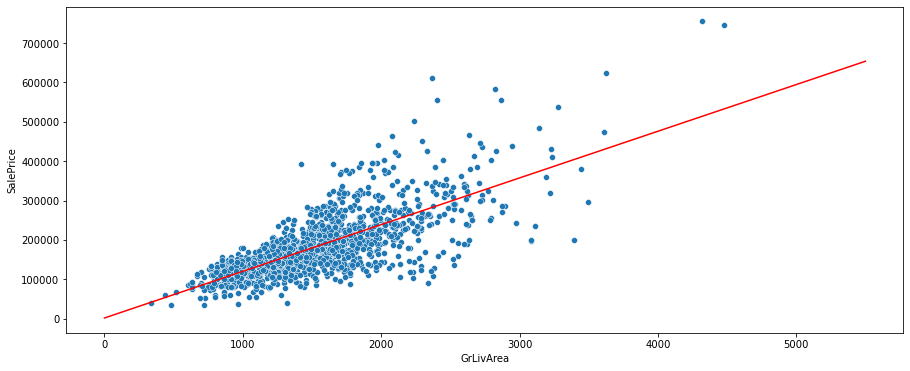

In [45]:
plt.figure(figsize=(15, 6))

# faça um scatterplot da fgeature pelo target
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice")

# faça um plot da reta do modelo
# crie um array com os valores de x. dica:  use o range aproximado da variável GrLivArea
# crie um array de y com a equação da reta usando os coeficientes encontrados
x = np.linspace(0, 5500, 10000)
y = reg_lin.intercept_ + reg_lin.coef_[0]*x
plt.plot(x, y, color="red")

Fazendo uma previsão:

In [46]:
b0 = reg_lin.intercept_
b1 = reg_lin.coef_[0]

In [47]:
# previsão explicita, usando os coeficientes

x = 1504

y_hat = reg_lin.intercept_ + reg_lin.coef_[0]*x

x, y_hat

(1504, 179954.75918529526)

Ou ainda:

In [48]:
# isso dá erro

#reg_lin.predict(1504)

In [49]:
# previsão usando o predict

reg_lin.predict([[1504]])

array([179954.7591853])

In [50]:
reg_lin.predict(np.array(1504).reshape(1, -1))

array([179954.7591853])

Entendendo o reshape...

In [51]:
m = np.array([[1, 2, 4],
              [3, 4, 5]])

In [52]:
print(m)

[[1 2 4]
 [3 4 5]]


In [53]:
print(m.reshape(3, 2))

[[1 2]
 [4 3]
 [4 5]]


In [54]:
print(m.reshape(3, -1))

[[1 2]
 [4 3]
 [4 5]]


In [55]:
print(m.reshape(-1, 1))

[[1]
 [2]
 [4]
 [3]
 [4]
 [5]]


In [56]:
# matriz com 1 linha, e (...) colunas
print(m.reshape(1, -1))

[[1 2 4 3 4 5]]


In [57]:
# matriz com 1 coluna e (...) linhas
print(m.reshape(-1, 1))

[[1]
 [2]
 [4]
 [3]
 [4]
 [5]]


____________

É raro que consigamos visualizar nosso modelo final como fizemos acima, mas no caso da regressão linear simples, temos essa sorte! :)

Vamos agora fazer algumas previsões!

In [58]:
# 5) Use o modelo treinado para fazer previsões usando os dados de teste 
y_pred = reg_lin.predict(X_test.values.reshape(-1,1))

In [59]:
y_pred

array([229653.27048225, 118632.252406  , 123495.35255678, 198932.7109932 ,
       193713.77424603, 126579.26972556, 233330.24864503, 300464.7531655 ,
       235228.04382582, 166788.80511856, 158130.1146062 , 168212.15150415,
       172482.19066093, 254443.22003132, 202016.62816199, 172956.63945613,
       205574.99412597, 136068.24562951, 124918.69894237, 176989.45421531,
       156469.54382301, 190155.40828204, 176633.61761891, 367599.25768596,
       171296.06867294, 143778.03855148, 160502.35858219, 104042.95195367,
       191815.97906524, 134170.45044872, 150064.48508784, 125867.59653276,
       198458.262198  , 114480.82544802, 195611.56942682, 345300.16431167,
       169042.43689575, 230246.33147624, 161214.03177499, 106177.97153206,
       141049.95797909, 251833.75165774, 114243.60105042,  98349.5664113 ,
       118750.8646048 , 179598.9225889 , 129900.41129194, 114836.66204442,
        98349.5664113 , 156706.76822061, 245665.91732017, 135356.57243672,
       156232.31942541, 1

Agora que temos o modelo treinado e algumas previsões, como avaliamos a performance do modelo?

Para isso, podemos dar uma olhada nos **resíduos** das predições! Os resíduos nada mais são do que **os erros do modelo**, ou seja, **a diferença entre cada valor predito e o valor real**, para **os dados de teste!**. Isto é,

$$R(y_i) = y_i - \hat{y}_i $$

$$R(y_i) + \hat{y}_i= y_i  $$

$$ \hat{y}_i= y_i - R(y_i)  $$

In [60]:
#Residuo
residuo = y_test - y_pred

In [61]:
residuo

1322    -39653.270482
837     -18632.252406
413      -8495.352557
522     -39932.710993
1036    121786.225754
            ...      
479     -46241.409033
1361     76961.323646
1415    -11764.552107
651     -72666.432378
722      20457.048046
Name: SalePrice, Length: 292, dtype: float64

In [62]:
# Estatísticas descritivas do resíduo
residuo.describe()

count       292.000000
mean       1054.794211
std       53073.332679
min     -170124.808891
25%      -24443.432570
50%        1494.653463
75%       23363.924359
max      178054.379366
Name: SalePrice, dtype: float64

In [63]:
df['SalePrice'].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice'>

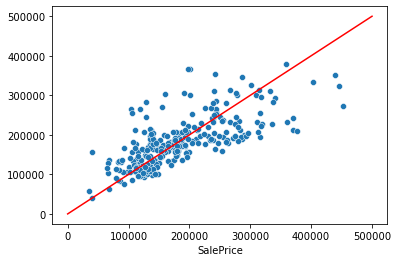

In [64]:
# faça um scatterplot do valor predito pelo valor real
#Caso os dois valores fossem iguais, os pontos cairiam em cima da linha vermelha
x = np.linspace(0, 500000, 100000)
y = x
plt.plot(x,y,color='red')


sns.scatterplot(x=y_test, y=y_pred)

O caso 100% ideal seria $y_i = \hat{y}_i$, o que produziria uma reta exata!

Quanto mais "espalhados" estiverem os pontos em torno da reta, em geral **pior é o modelo**, pois ele está errando mais!

Uma forma de quantificar isso através de uma métrica conhecida como **$R^2$**, o **coeficiente de determinação**.

Este coeficiente indica **o quão próximos os dados estão da reta ajustada**. Por outro lado, o $R^2$ representa a porcentagem de variação na resposta que é explicada pelo modelo.

$$R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$$

É possível utilizar o $R^2$ nos dados de treino, mas isso não é tão significante, devido ao overfitting, que discutiremos mais a frente. Faz mais sentido calcularmos o $R^2$ nos dados de teste como faremos a seguir. Essa métrica equivale, portanto, **ao gráfico que fizemos acima!**


DOC metricas do sklearn: https://scikit-learn.org/stable/modules/model_evaluation.html

In [65]:
# r2_score do sklearn.metrics
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.49160330551638054

Outra coisa importante é que os resíduos sejam **normalmente distribuídos**.

Se esse não for o caso, é muito importante que você reveja se o modelo escolhido de fato é adequado ao seu problema!

In [66]:
# importa o teste
from scipy.stats import normaltest
    
# fazendo o teste
test_stat, p = normaltest(residuo)

print("Estatística de teste:", test_stat)
print("\np-value:", p)

# interpretação do teste
# nível de significância de 5%
alpha = 0.05 #nivel de significancia

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser normal")
else:
    print("\nRejeição da H_0: amostra não é normal")

Estatística de teste: 15.33054052811694

p-value: 0.00046883003024723223

Rejeição da H_0: amostra não é normal


Além dos resíduos, existem três principais **métricas de avaliação** do modelo de regressão linear:

**Mean Absolute Error** (MAE) é a média do valor absoluto de todos os resíduos (erros):

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) é a média dos erros quadrados:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) é a raiz quadrada da média dos erros quadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando as métricas:

- **MAE** é a mais simples de entender, mas ela penaliza mais erros menores;
- **MSE** é uma métrica popular, pois ela penaliza mais erros maiores, o que faz mais sentido em aplicações reais.
- **RMSE** é ainda mais popular, pois esta métrica está nas mesmas unidades que o target.

Estas métricas todas podem ser utilizadas como **funções de custo** a serem minimizadas pelo algoritmo do estimador.

In [67]:
from sklearn import metrics

In [68]:
# calcule MAE
metrics.mean_absolute_error(y_test,y_pred)

37694.28175792022

In [69]:
# calcule MSE
metrics.mean_squared_error(y_test,y_pred)

2808244730.245439

In [70]:
# calcule RMSE
metrics.mean_squared_error(y_test,y_pred,squared=False)

52992.874334625776

Vamos dar uma olhada em tudo junto:


Intercepto: 1562.0121909831068
Coeficienter angular: [118.6121988]

####################################################



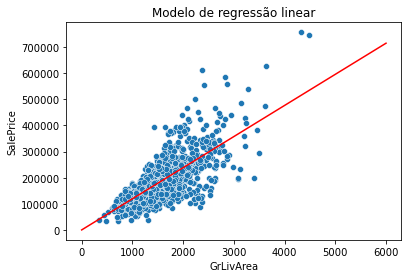


####################################################



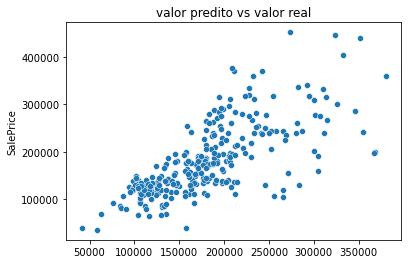

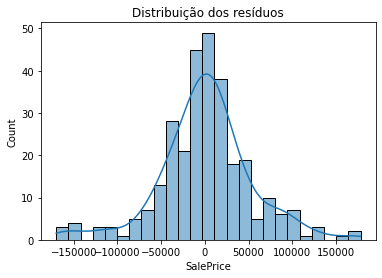


####################################################


Métricas de avaliação:

R^2: 0.49160330551638054
MAE: 37694.28175792022
MSE: 2808244730.245439
RMSE: 52992.874334625776


In [71]:
X = df['GrLivArea']
y = df['SalePrice']

# 1) Importar
from sklearn.linear_model import LinearRegression

# 2) Instanciar
estimador = LinearRegression()

# 3) Dividir os dados em treino e teste
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# 4) Treinamento
modelo = estimador.fit(np.array(X_treino).reshape(-1, 1), y_treino)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)

print("\n####################################################\n")

plt.title("Modelo de regressão linear")

sns.scatterplot(data=df, x="GrLivArea", y="SalePrice")

x = np.linspace(0, 6000, 100000)
y = modelo.intercept_ + modelo.coef_[0]*x
plt.plot(x, y, color="red")
plt.show()

print("\n####################################################\n")

# 5) Teste
predictions = modelo.predict(np.array(X_teste).reshape(-1, 1))

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_teste)
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação:")

# 6) 
from sklearn import metrics

print('\nR^2:', metrics.r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', metrics.mean_squared_error(y_test, y_pred,squared=False))

Utilizando outra feature

In [72]:
X = df['OverallQual']
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg_lin2 = LinearRegression()

reg_lin2.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

In [73]:
y_pred = reg_lin2.predict(X_test.values.reshape(-1, 1))

In [74]:
print('\nR^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', metrics.mean_squared_error(y_test, y_pred,squared=False))


R^2: 0.7009795959297107
MAE: 31130.10981011291
MSE: 1651707186.6864934
RMSE: 40641.20060586908


___
___
___

## 3) Regressão linear múltipla

O modelo que fizemos acima considera uma única feature como preditora do preço da casa.

Mas temos outras 78 dessas features! Será que não há mais informação útil em todas essas outras variáveis?

Em geral, sim! É natural que esperemos que **mais variáveis** tragam **mais informações** ao modelo, e, portanto, o torne mais preciso!

Para incorporar estas outras variáveis ao modelo, é muito simples! 

Podemos passar a utilizar outros atributos (como o número de cômodos, qual é a renda média da vizinhança, etc.), e neste caso teremos uma **Regressão Linear Múltipla**, que é expressa pela seguinte função de hipótese:

$$ y = f_{H, \vec{b}} = b_0 + b_1 X_1 + b_2 X_2 + \cdots + b_n X_n $$

Neste caso, além de $b_0$ e $b_1$, temos também outros coeficientes, um pra cada uma das $n$ features que escolhermos! Ou seja, o vetor de parâmetros tem $n+1$ dimensões:

$$\vec{b} = \begin{bmatrix}
b_0\\ 
b_1\\
\vdots\\
b_n
\end{bmatrix}$$

Modelos de regressão múltipla são potencialmente mais precisos, mas há também um lado ruim: nós perdemos a **possibilidade de visualização**. Agora, não temos mais uma reta, mas sim um **hiperplano** que relaciona todas as features com o target!

<img src="https://miro.medium.com/max/1120/0*rGSfRsMjiQeG5jof.png" width=500>

Vamos construir esse modelo?

In [75]:
# Verificando novamente os dados do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   MSZoning       1458 non-null   object 
 3   LotFrontage    1199 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1458 non-null   object 
 8   LandContour    1458 non-null   object 
 9   Utilities      1458 non-null   object 
 10  LotConfig      1458 non-null   object 
 11  LandSlope      1458 non-null   object 
 12  Neighborhood   1458 non-null   object 
 13  Condition1     1458 non-null   object 
 14  Condition2     1458 non-null   object 
 15  BldgType       1458 non-null   object 
 16  HouseStyle     1458 non-null   object 
 17  OverallQual    1458 non-null   int64  
 18  OverallC

In [76]:
# Selecionar somente as features numéricas
df.select_dtypes(include=[np.number]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   LotFrontage    1199 non-null   float64
 3   LotArea        1458 non-null   int64  
 4   OverallQual    1458 non-null   int64  
 5   OverallCond    1458 non-null   int64  
 6   YearBuilt      1458 non-null   int64  
 7   YearRemodAdd   1458 non-null   int64  
 8   MasVnrArea     1450 non-null   float64
 9   BsmtFinSF1     1458 non-null   int64  
 10  BsmtFinSF2     1458 non-null   int64  
 11  BsmtUnfSF      1458 non-null   int64  
 12  TotalBsmtSF    1458 non-null   int64  
 13  1stFlrSF       1458 non-null   int64  
 14  2ndFlrSF       1458 non-null   int64  
 15  LowQualFinSF   1458 non-null   int64  
 16  GrLivArea      1458 non-null   int64  
 17  BsmtFullBath   1458 non-null   int64  
 18  BsmtHalf

In [77]:
# Verificar ocorrência de valores nulos
df.select_dtypes(include=[np.number]).isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [78]:
# selecione todas as outras colunas numéricas como a variável de features X
# dica: df.select_dtypes(include=[np.number])
df = df.select_dtypes(include=[np.number])
df = df.dropna(axis='columns', how='any')

In [79]:
# Verificando novamente a ocorrência de valores nulos
df.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

Observação: a coluna "Id" traz apenas um número de identificação arbitrário que não deve ser correlacionado com o target. Portanto, vamos desconsiderar esta coluna de nosso modelo!

In [80]:
# Criando o X e o y
X = df.drop(columns=['Id', 'SalePrice'])
y = df['SalePrice']

In [81]:
# Nomes das features
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [82]:
# Shape de X
X.shape

(1458, 33)

Intercepto: -355999.74706666125
Coeficientes angulares: [-1.12585601e+02  4.90238272e-01  1.46756366e+04  5.05565957e+03
  3.94922596e+02  1.34368773e+02  2.59168796e+01 -2.65571175e+00
  6.39940711e-01  2.39011085e+01  2.40115938e+01  2.48670585e+01
 -3.00610179e+00  4.58725506e+01 -6.09458509e+02 -3.72881778e+03
 -1.21068789e+03 -1.90728034e+03 -1.51336961e+04 -1.42179718e+04
  5.49321316e+03  6.06298683e+02  1.34345675e+03  2.08353538e+01
  1.00323546e+01  1.91281980e+01  1.18709828e+00  1.40666977e+01
  2.01493675e+01  5.40145044e+01 -1.96142385e+00 -3.90326342e+02
 -3.75378807e+02]

####################################################



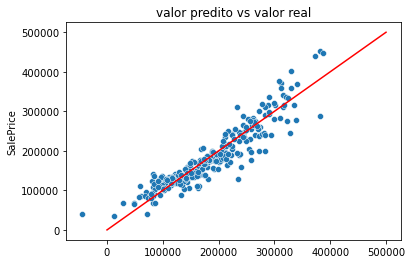

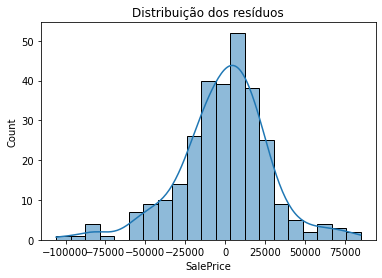


####################################################


Métricas de avaliação (dados de teste):

R^2: 0.8563506695017897
MAE: 20734.904154106393
MSE: 793479736.8905437
RMSE: 28168.77237102362


In [83]:
# Etapas da modelagem

# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# 4)
modelo = estimador.fit(X_treino,y_treino)

print("Intercepto:", modelo.intercept_ )
print("Coeficientes angulares:",modelo.coef_ )

print("\n####################################################\n")

# 5)
predictions = modelo.predict(X_teste)


plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_teste)
plt.plot(np.linspace(0, 500000, 1000), np.linspace(0, 500000, 1000), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação (dados de teste):\n")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_teste, predictions))
print('MAE:', metrics.mean_absolute_error(y_teste, predictions))
print('MSE:', metrics.mean_squared_error(y_teste, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predictions)))

Também é possível calcularmos as métricas de performance na base de treino, mas temos que tomar muito cuidado ao interpretar estas medidas!

Mais adiante falaremos sobre overfitting, e este ponto ficará mais claro.


Performance de TREINO



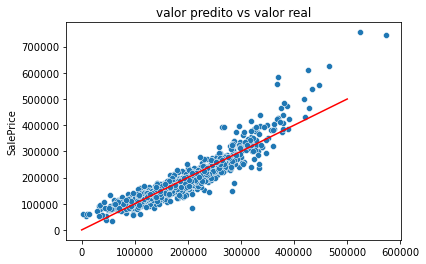

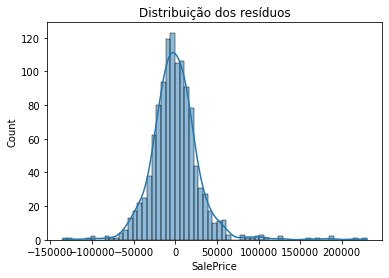


####################################################


Métricas de avaliação (dados de treino):

R^2: 0.8616841881921395
MAE: 20508.03903454966
MSE: 900886802.9866577
RMSE: 30014.776410739058


In [84]:
print("\nPerformance de TREINO\n")

predictions = modelo.predict(X_treino)

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_treino)
plt.plot(np.linspace(0, 500000, 1000), np.linspace(0, 500000, 1000), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_treino-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação (dados de treino):\n")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_treino, predictions))
print('MAE:', metrics.mean_absolute_error(y_treino, predictions))
print('MSE:', metrics.mean_squared_error(y_treino, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_treino, predictions)))

Vamos olhar para os parâmetros do modelo:

In [85]:
#Coeficientes angulares
modelo.coef_

array([-1.12585601e+02,  4.90238272e-01,  1.46756366e+04,  5.05565957e+03,
        3.94922596e+02,  1.34368773e+02,  2.59168796e+01, -2.65571175e+00,
        6.39940711e-01,  2.39011085e+01,  2.40115938e+01,  2.48670585e+01,
       -3.00610179e+00,  4.58725506e+01, -6.09458509e+02, -3.72881778e+03,
       -1.21068789e+03, -1.90728034e+03, -1.51336961e+04, -1.42179718e+04,
        5.49321316e+03,  6.06298683e+02,  1.34345675e+03,  2.08353538e+01,
        1.00323546e+01,  1.91281980e+01,  1.18709828e+00,  1.40666977e+01,
        2.01493675e+01,  5.40145044e+01, -1.96142385e+00, -3.90326342e+02,
       -3.75378807e+02])

In [86]:
#Coeficiente linear
modelo.intercept_

-355999.74706666125

In [87]:
# dica: use o código abaixo para fazer um dataframe com os coeficientes
coeff_df = pd.DataFrame(modelo.coef_, X.columns, columns=['Parameter value'])
coeff_df

,Parameter value
MSSubClass,-112.585601
LotArea,0.490238
OverallQual,14675.636583
OverallCond,5055.659575
YearBuilt,394.922596
YearRemodAdd,134.368773
BsmtFinSF1,25.916880
BsmtFinSF2,-2.655712
BsmtUnfSF,0.639941
TotalBsmtSF,23.901109


É possível interpretar os parâmetros e atribuir uma "importância" de cada feature ao valor do respectivo parâmetro. Mas, como discutimos, essa análise é afetada pela escala das features! Veja:

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

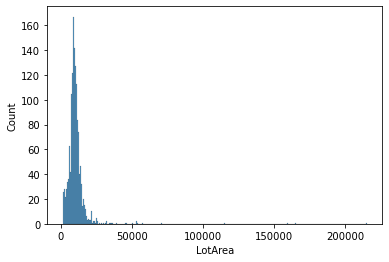

In [88]:
#Distribuição da feature 'LotArea' 
sns.histplot(data=df, x='LotArea')

<AxesSubplot:xlabel='OverallQual', ylabel='Count'>

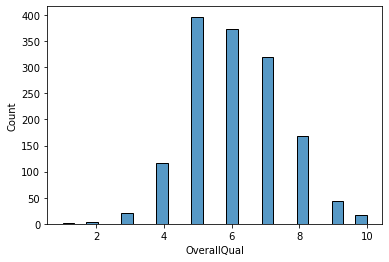

In [89]:
#Distribuição da feature 'OverallQual' 
sns.histplot(data=df, x='OverallQual')

In [90]:
# Estatísticas descritivas da feature 'LotArea'
df['LotArea'].describe()

count      1458.000000
mean      10459.936900
std        9859.198156
min        1300.000000
25%        7544.500000
50%        9475.000000
75%       11600.000000
max      215245.000000
Name: LotArea, dtype: float64

In [91]:
# Estatísticas descritivas da feature 'OverallQual'
df['OverallQual'].describe()

count    1458.000000
mean        6.093964
std         1.376369
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

Uma forma de eliminarmos o efeito da escala, é **escalando os dados** (um pré-processamento).

Isso pode ser visto como uma terceira passada no ciclo.

### Min-Max Scaler:

$$feature_{scaled} = \frac{feature-feature_{min}}{feature_{max}-feature_{min}}$$

In [92]:
# Valores de min e max da feature 'LotArea'
df['LotArea'].min(), df['LotArea'].max()

(1300, 215245)

In [93]:
#Describe da feature 'LotArea' após o scaler
((df['LotArea'] - df['LotArea'].min())/(df['LotArea'].max() - df['LotArea'].min())).describe()

count    1458.000000
mean        0.042814
std         0.046083
min         0.000000
25%         0.029187
50%         0.038211
75%         0.048143
max         1.000000
Name: LotArea, dtype: float64

Aplicando o Min-Max Sacaler para todas as features no dataframe:

In [94]:
from sklearn.preprocessing import MinMaxScaler 

#1) Instanciar o scaler
mms = MinMaxScaler()

#2) Treinar o scaler com os dados de treino
mms.fit(X_treino)

#3) Transformando os dados
X_treino_scaled = mms.transform(X_treino)
X_teste_scaled = mms.transform(X_teste)


Avaliando um modelo com os dados escalados:

Intercepto: 3304823443287855.5
Coeficientes angulares: [-1.91580567e+04  1.05108860e+05  1.32073823e+05  4.04877214e+04
  5.45330873e+04  8.06059082e+03 -1.21830202e+16 -6.27525764e+15
 -1.30071001e+16  1.78179454e+16 -1.43008724e+17 -1.03400915e+17
 -2.86418032e+16  2.02195107e+17 -1.85225143e+03 -7.48929907e+03
 -3.59658441e+03 -3.78704684e+03 -1.21100214e+05 -2.84153089e+04
  6.05027308e+04  1.81531376e+03  5.34136326e+03  2.90080013e+04
  8.63323756e+03  1.04471707e+04  6.67880154e+02  7.18169224e+03
  9.73251381e+03  3.99080276e+04 -3.03422417e+04 -4.27888488e+03
 -1.49990533e+03]

####################################################



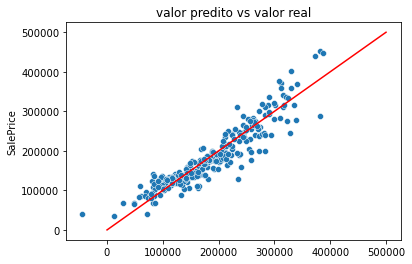

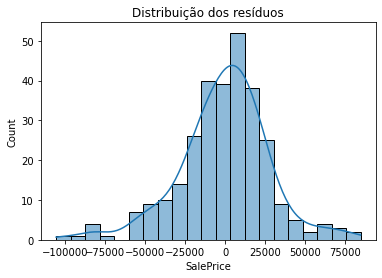


####################################################


Métricas de avaliação (dados de teste):

R^2: 0.8563498921067918
MAE: 20737.45890410959
MSE: 793484031.0085616
RMSE: 28168.848592169357


In [95]:
X = df.drop(columns=["Id","SalePrice"])
y = df['SalePrice']

# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# NOVO: aplicando o scaler!! - usamos o minmax pra que todas as features
# tenham o mesmo intervalo no espaço amostral - (0, 1)
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

# agora, vamos FITAR o scaler COM OS DADOS DE TREINO
mms.fit(X_treino)

# transformando os dados
X_treino = mms.transform(X_treino)
X_teste = mms.transform(X_teste)

#X_treino = mms.fit_transform(X_treino)
#X_teste = mms.transform(X_teste)


# 4)
modelo = estimador.fit(X_treino, y_treino)

print("Intercepto:", modelo.intercept_)
print("Coeficientes angulares:", modelo.coef_)

print("\n####################################################\n")

# 5)
predictions = modelo.predict(X_teste)

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_teste)
plt.plot(np.linspace(0, 500000, 1000), np.linspace(0, 500000, 1000), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação (dados de teste):\n")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_teste, predictions))
print('MAE:', metrics.mean_absolute_error(y_teste, predictions))
print('MSE:', metrics.mean_squared_error(y_teste, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predictions)))

In [96]:
# Avaliando os coeficientes agora que todas as features estão na mesma escala
coeff_df = pd.DataFrame(modelo.coef_, X.columns, columns=['Parameter value'])

coeff_df.abs().sort_values(by='Parameter value',ascending=False)

,Parameter value
GrLivArea,2.021951e+17
1stFlrSF,1.430087e+17
2ndFlrSF,1.034009e+17
LowQualFinSF,2.864180e+16
TotalBsmtSF,1.781795e+16
BsmtUnfSF,1.300710e+16
BsmtFinSF1,1.218302e+16
BsmtFinSF2,6.275258e+15
OverallQual,1.320738e+05
BedroomAbvGr,1.211002e+05


In [97]:
# Analisando os valores absolutos dos coeficientes


Se fizermos um modelo apenas com features que possuem coeficientes maiores que um determinado valor. Podemos obter um modelo melhor?

(Coeficientes maiores que 10000, por exemplo)

Intercepto: -66887.8079563388
Coeficientes angulares: [ -18387.05104198  106982.46822486  134684.62898979   46909.4805288
   60460.08010525   62628.58224077    9833.45671751   66332.4073645
   75180.04089135   51888.49607426  183127.5624497  -128116.55191156
  -31879.5539901    63858.73615025   33534.4074005    10517.33593507
   42626.41069522  -29265.87771366]

####################################################



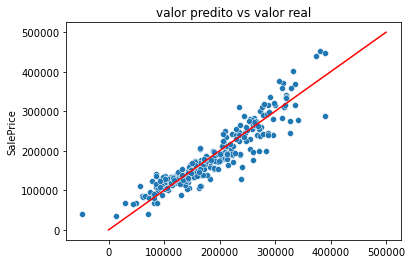

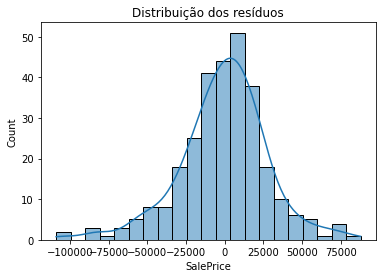


####################################################


Métricas de avaliação (dados de teste):

R^2: 0.8524045554827806
MAE: 20983.249738580333
MSE: 815276994.8567576
RMSE: 28553.055788422324


In [98]:
X = df.drop(columns=["Id","SalePrice",'ScreenPorch', 'WoodDeckSF', 'YearRemodAdd','BsmtHalfBath',
                     '3SsnPorch', 'LowQualFinSF', 'GarageCars', 'MoSold', 'HalfBath', 'FullBath',
                     'BsmtFinSF2','BsmtFullBath', 'Fireplaces', 'YrSold', 'EnclosedPorch'])
y = df['SalePrice']

# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

mms = MinMaxScaler()

# agora, vamos FITAR o scaler COM OS DADOS DE TREINO
mms.fit(X_treino)

# transformando os dados
X_treino = mms.transform(X_treino)
X_teste = mms.transform(X_teste)

# 4)
modelo = estimador.fit(X_treino, y_treino)

print("Intercepto:", modelo.intercept_)
print("Coeficientes angulares:", modelo.coef_)

print("\n####################################################\n")

# 5)
predictions = modelo.predict(X_teste)

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_teste)
plt.plot(np.linspace(0, 500000, 1000), np.linspace(0, 500000, 1000), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação (dados de teste):\n")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_teste, predictions))
print('MAE:', metrics.mean_absolute_error(y_teste, predictions))
print('MSE:', metrics.mean_squared_error(y_teste, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predictions)))

A performance do modelo melhorou?

____
____
____

## 4) Overfitting

Overfit é um dos conceitos mais importantes em apredizado de maquina.

Muitas vezes alguns modelos têm 100% de acerto nos dados de **treino**, mas **na base de teste** a performance cai para menos de 50%.

Isso pode acontecer porque o modelo fica **especialista apenas no conjunto de treino**, não conseguindo **generalizar os padrões para além dos dados vistos**.

<img src="https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png" width=800>

O overfitting está intimamente ligado com o conceito de **viés** (bias) e **variância** (variance):

>**Viés**<br>
É a diferença entre o que o modelo prediz, e o valor correto a ser predito.<br>
Modelos com alto viés são muito simples, de modo a **não conseguir capturar as relações que os dados de treino exibem** (underfit).<br>
Isso faz com que ambos os erros de treino e de teste sejam altos.
<br><br>
Em outras palavras:<br>
**Incapacidade de um modelo de capturar a verdadeira relação entre features e target**


> **Variância**<br>
Variância se refere à variabilidade das predições de um modelo.<br>
Modelos com alta variância são muito complexos, por **aprenderem demais as relações  exibidas nos dados de treino** (overfit).<br>
Isso faz com que os erros de treino sejam baixos, mas os erros de teste sejam altos.
<br><br>
Em outras palavras:<br>
**Incapacidade de um modelo performar bem em outros datasets diferentes do usado no treinamento**. 

<img src="https://www.learnopencv.com/wp-content/uploads/2017/02/Bias-Variance-Tradeoff-In-Machine-Learning-1.png" width=500>

<img src="https://miro.medium.com/max/1494/1*C7ZKM93QVdpeSCGbF5TjIg.png" width=800>

Para demonstrar overfit ser usado o conjuto de teste [anscombe](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

In [99]:
#Importar os dados do dataset


In [100]:
# Filtrar apenas os dados do datest III


In [101]:
#Scatterplot do dataset III


Vamos supor que este dado represente valores de medições de um sensor, porém o sensor teve um pequeno problema durante a medição.

Podemos perceber facilmente qual é este erro, e qual seria a função de regreesão para este sensor com os dados validos: **regressão linear**.

In [102]:
# Plotar a regressão linear com o lmplot


Perceba que a função linear encontrar já aprensenta um padrão muito similiar aos dados, porém um ponto error faz com que ela não tenha um resultado otimo.

Podemos utilizar regressões polinomiais, que possuem ordem maiores que 1, para tentar diminuir o erro da regressão. Por exemplo, podemos considerar um polinômio de grau 6,

$$\hat{y}_{i} = \beta_{1} + \beta_{2} x_{i} + \beta_{3} {x_{i}}^{2} + \cdots + \beta_{6} {x_{i}}^{6}$$

Para criar modelos polinomiais com o sklearn, [dê uma olhada aqui](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). Mas, teremos uma aula sobre isso, logo logo!

In [103]:
# pra sumir os warnings



# Modelo polinomial de grau 6 utilizando o lmplot


Ao utilizarmos uma regressão de ordem 6 percebemos que ela se ajusta ao valor com erro, porém ela **se distancia da regressão que realmente representa os dados**. 

Tentar **aprender o erro faz com ela com ela não aprenda a função real**. 

Isto acontece pois ela se **super ajustou aos dados de treino, se distanciando dos dados reais**. 

__Como garantir que nosso modelo não está sofrendo de overfitting?__

Naturalmente, essa é uma pergunta de extrema importância, especialmente no contexto de **redes neurais**. [Veja aqui](https://towardsdatascience.com/8-simple-techniques-to-prevent-overfitting-4d443da2ef7d) e [aqui](https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323) algumas discussões.

Na prática: **jamais se apegue à peformance de treino como forma de avaliar o modelo!** O que queremos otimizar sempre será a performance **avaliada nos dados de teste**, isto é, a **performance de generalização** do modelo. 

Assim, é **avaliando o modelo nos dados de teste** que garantimos que uma boa performance não é produto do overfitting!

Mais adiante, discutiremos overfitting e o tradeoff viés/variância em detalhes. Por enquanto, uma boa prática é comparar as métricas de treino com as métricas de teste, conforme fizemos acima. Isso nos permite avaliar, de maneira rápida e simples, se houve underfitting!

# Conteúdo extra: PICKLE

Como salvar um modelo para utilizar posteriormente.

Intercepto: 3304823443287855.5
Coeficientes angulares: [-1.91580567e+04  1.05108860e+05  1.32073823e+05  4.04877214e+04
  5.45330873e+04  8.06059082e+03 -1.21830202e+16 -6.27525764e+15
 -1.30071001e+16  1.78179454e+16 -1.43008724e+17 -1.03400915e+17
 -2.86418032e+16  2.02195107e+17 -1.85225143e+03 -7.48929907e+03
 -3.59658441e+03 -3.78704684e+03 -1.21100214e+05 -2.84153089e+04
  6.05027308e+04  1.81531376e+03  5.34136326e+03  2.90080013e+04
  8.63323756e+03  1.04471707e+04  6.67880154e+02  7.18169224e+03
  9.73251381e+03  3.99080276e+04 -3.03422417e+04 -4.27888488e+03
 -1.49990533e+03]

####################################################



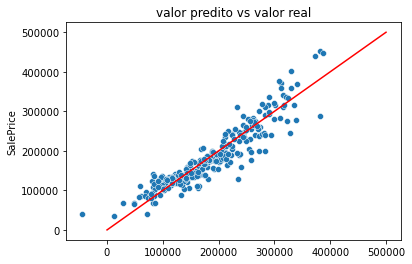

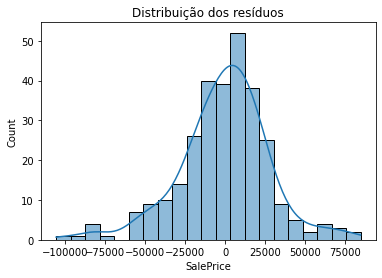


####################################################


Métricas de avaliação (dados de teste):

R^2: 0.8563498921067918
MAE: 20737.45890410959
MSE: 793484031.0085616
RMSE: 28168.848592169357


In [104]:
df = df.select_dtypes(include=[np.number])
df = df.dropna(axis="columns", how="any")

X = df.drop(columns=["Id","SalePrice"])
y = df['SalePrice']

# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# NOVO: aplicando o scaler!! - usamos o minmax pra que todas as features
# tenham o mesmo intervalo no espaço amostral - (0, 1)
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

# agora, vamos FITAR o scaler COM OS DADOS DE TREINO
mms.fit(X_treino)

# transformando os dados
X_treino = mms.transform(X_treino)
X_teste = mms.transform(X_teste)

# 4)
modelo = estimador.fit(X_treino, y_treino)

print("Intercepto:", modelo.intercept_)
print("Coeficientes angulares:", modelo.coef_)

print("\n####################################################\n")

# 5)
predictions = modelo.predict(X_teste)

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_teste)
plt.plot(np.linspace(0, 500000, 1000), np.linspace(0, 500000, 1000), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação (dados de teste):\n")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_teste, predictions))
print('MAE:', metrics.mean_absolute_error(y_teste, predictions))
print('MSE:', metrics.mean_squared_error(y_teste, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predictions)))

In [105]:
modelo

LinearRegression()

In [106]:
import pickle

In [107]:
# f = open("regressao_linear_scaler.pkl", "wb")

# pickle.dump(modelo, f)

# f.close()

with open("regressao_linear_scaler.pkl", "wb") as f:
    
    pickle.dump(modelo, f)

Passou-se um tempo, quero recuperar o modelo

In [108]:
with open("regressao_linear_scaler.pkl", "rb") as f:
    
    modelo_lido = pickle.load(f)

In [109]:
modelo_lido

LinearRegression()

Agora, posso usar esse objeto, como se eu tivesse acabado de treinar ele

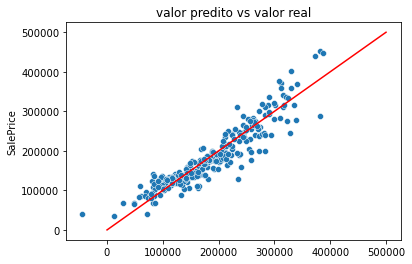

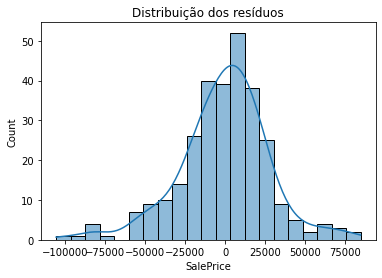


####################################################


Métricas de avaliação (dados de teste):

R^2: 0.8563498921067918
MAE: 20737.45890410959
MSE: 793484031.0085616
RMSE: 28168.848592169357


In [110]:
# 5)
predictions = modelo_lido.predict(X_teste)

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_teste)
plt.plot(np.linspace(0, 500000, 1000), np.linspace(0, 500000, 1000), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação (dados de teste):\n")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_teste, predictions))
print('MAE:', metrics.mean_absolute_error(y_teste, predictions))
print('MSE:', metrics.mean_squared_error(y_teste, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predictions)))

____
___
___